# Task 1

## **Installing packages and importing the scRNAseq and test data.**

We will use the test data and 2D gastruloid scRNAseq data for our tool development and assessments.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, sys
os.environ['R_HOME'] = sys.exec_prefix+"/lib/R/"
!pip install scanpy
!pip install scFates

import scanpy as sc
import scFates as scf
import numpy as np
import pandas as pd

In [ ]:
!pip install git+https://github.com/pcahan1/PySingleCellNet/
!pip install scikit-misc
!pip install -q git+https://github.com/theislab/cellrank
!pip install git+https://github.com/CahanLab/oneSC.git

  Cloning https://github.com/pcahan1/PySingleCellNet/ to /tmp/pip-req-build-ynn0zrbl
  Running command git clone --filter=blob:none --quiet https://github.com/pcahan1/PySingleCellNet/ /tmp/pip-req-build-ynn0zrbl
  Resolved https://github.com/pcahan1/PySingleCellNet/ to commit 82bc24659cc1efd84860e8fa8de8c66f2f897230
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.2 MB/s eta 0:00:00
  Created wheel for pySingleCellNet: filename=pysinglecellnet-0.1.1-py3-none-any.whl size=39058 sha256=bf9a72c5b845985c5dbd6f2d2ed0c9aa8888e6922bea041dac2fd99da3b048c8
  Stored in directory: /tmp/pip-ephem-wheel-cache-663wuy5u/wheels/a7/f4/79/c5cf98052dfeb8c0989e79728e80b04e7a04bbc073ba8e276c
Successfully 

In [ ]:
import matplotlib.pyplot as plt
import pySingleCellNet as cn
import skmisc
import scvelo as scv
import cellrank as cr
import onesc
import networkx as nx
import warnings

**Importing the test PBMC data**


In [ ]:
# import and clean up data

cna_bench = sc.read_h5ad('/content/drive/MyDrive/PBMC_simulated_cnas_041025.h5ad')
cna_bench.var_names_make_unique()

In [ ]:
print(cna_bench.var.head(30))

                       gene_ids    feature_types  genome     mt   ribo  \
original_index                                                           
AL627309.1      ENSG00000238009  Gene Expression  GRCh38  False  False   
AL627309.3      ENSG00000239945  Gene Expression  GRCh38  False  False   
AL669831.5      ENSG00000237491  Gene Expression  GRCh38  False  False   
FAM87B          ENSG00000177757  Gene Expression  GRCh38  False  False   
LINC00115       ENSG00000225880  Gene Expression  GRCh38  False  False   
FAM41C          ENSG00000230368  Gene Expression  GRCh38  False  False   
AL645608.3      ENSG00000230699  Gene Expression  GRCh38  False  False   
SAMD11          ENSG00000187634  Gene Expression  GRCh38  False  False   
NOC2L           ENSG00000188976  Gene Expression  GRCh38  False  False   
KLHL17          ENSG00000187961  Gene Expression  GRCh38  False  False   
PLEKHN1         ENSG00000187583  Gene Expression  GRCh38  False  False   
PERM1           ENSG00000187642  Gene 

**Importing the 2D gastruloid scRNAseq data**


In [ ]:
#import 2D gastruloid PSCs scRNAseq data
data1 = sc.read_h5ad('/content/drive/MyDrive/GSM8633801_adata_timeseries_new_D6-10_filtered_qc.h5ad')
data1.var_names_make_unique()

In [ ]:
print(data1.var.head(30))

Empty DataFrame
Columns: []
Index: [A1CF (ENSG00000148584), A2M (ENSG00000175899), A2ML1 (ENSG00000166535), A4GALT (ENSG00000128274), AAAS (ENSG00000094914), AACS (ENSG00000081760), AADAC (ENSG00000114771), AADACL3 (ENSG00000188984), AADAT (ENSG00000109576), AAGAB (ENSG00000103591), AAK1 (ENSG00000115977), AAMDC (ENSG00000087884), AAMP (ENSG00000127837), AANAT (ENSG00000129673), AAR2 (ENSG00000131043), AARD (ENSG00000205002), AARS (ENSG00000090861), AARS2 (ENSG00000124608), AARSD1 (ENSG00000266967), AASDH (ENSG00000157426), AASDHPPT (ENSG00000149313), AASS (ENSG00000008311), AATF (ENSG00000275700), AATK (ENSG00000181409), ABAT (ENSG00000183044), ABCA1 (ENSG00000165029), ABCA12 (ENSG00000144452), ABCA2 (ENSG00000107331), ABCA3 (ENSG00000167972), ABCA4 (ENSG00000198691)]


In [ ]:
print(type(data1.X))
print(data1.X.shape)         # Should be (n_cells, n_genes)
print(data1.X[:5, :5])       # View first 5 cells × first 5 genes


<class 'scipy.sparse._csr.csr_matrix'>
(15894, 15993)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (5, 5)>
  Coords	Values
  (1, 4)	2.0
  (2, 3)	1.0
  (2, 4)	2.0
  (3, 4)	2.0
  (4, 4)	3.0


In [ ]:
print(data1.raw)  # If not None, raw counts might be stored here
print(data1.X[:5, :5].toarray())  # Show a small part of the matrix
print(data1.shape)

None
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2.]
 [0. 0. 0. 1. 2.]
 [0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 3.]]
(15894, 15993)


**scRNAseq data gene annotations**

Since the 2d gastruloid data and many other .h5ad scRNAseq data files typically only store gene names and raw expression, we will first need to query positions and annotations for each of the genes in the dataset. We created a function for this specifically (called add_gene_coordinates) that annotates each gene's chromosome location and start/end positions on the chromosome. These locations will be used later for binning in CNA detection.

In [ ]:
!pip install pybiomart

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.9 MB/s eta 0:00:00


In [ ]:
def add_gene_coordinates(adata):
    from pybiomart import Server

    # Connect to Ensembl via BioMart
    server = Server(host='http://www.ensembl.org')
    dataset = server.marts['ENSEMBL_MART_ENSEMBL'].datasets['hsapiens_gene_ensembl']

    # Query BioMart
    gene_ids = [g.split('(')[-1].strip(')') if '(' in g else g for g in adata.var_names]
    results = dataset.query(attributes=[
        'ensembl_gene_id', 'external_gene_name',
        'chromosome_name', 'start_position', 'end_position'
    ])
    results = results.set_index('Gene stable ID')

    # Match back to AnnData
    adata.var['ensembl'] = gene_ids
    adata.var = adata.var.join(results, on='ensembl')
    adata.var.rename(columns={
        'Chromosome/scaffold name': 'chromosome',
        'Gene start (bp)': 'start',
        'Gene end (bp)': 'end',
        'Gene name': 'symbol'
    }, inplace=True)

    return adata


In [ ]:
data1 = add_gene_coordinates(data1)

In [ ]:
print(data1.var.columns)
print(data1.var['chromosome'].notna().sum(), "genes have coordinates")
print(data1.var[['chromosome', 'start', 'end']].head(10))

Index(['ensembl', 'symbol', 'chromosome', 'start', 'end'], dtype='object')
15982 genes have coordinates
                          chromosome        start          end
A1CF (ENSG00000148584)            10   50799409.0   50885675.0
A2M (ENSG00000175899)             12    9067664.0    9116229.0
A2ML1 (ENSG00000166535)           12    8822621.0    8887001.0
A4GALT (ENSG00000128274)          22   42692121.0   42721298.0
AAAS (ENSG00000094914)            12   53307456.0   53324864.0
AACS (ENSG00000081760)            12  125065434.0  125143333.0
AADAC (ENSG00000114771)            3  151814073.0  151828488.0
AADACL3 (ENSG00000188984)          1   12716110.0   12728760.0
AADAT (ENSG00000109576)            4  170060222.0  170091699.0
AAGAB (ENSG00000103591)           15   67200667.0   67255195.0


## **Quality control of the data.**

We also will need to perform quality control on both datasets similar to past homeworks.

In [ ]:

def run_qc(adata, min_genes=3000, max_counts=25000, min_cells=3, max_pct_mt=2, max_pct_ribo=3):
    adata_qc = adata.copy()

    adata_qc.var['mt'] = adata_qc.var_names.str.upper().str.startswith('MT-')
    ribo_prefix = ('RPS', 'RPL')
    adata_qc.var['ribo'] = adata_qc.var_names.str.upper().str.startswith(ribo_prefix)

    sc.pp.calculate_qc_metrics(adata_qc, qc_vars=['mt', 'ribo'], inplace=True)

    # Plot QC metrics
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    sc.pl.scatter(adata_qc, x='total_counts', y='n_genes_by_counts', ax=axs[0], show=False)
    sc.pl.scatter(adata_qc, x='total_counts', y='pct_counts_mt', ax=axs[1], show=False)
    sc.pl.scatter(adata_qc, x='total_counts', y='pct_counts_ribo', ax=axs[2], show=False)
    plt.tight_layout()
    plt.show()

    # Apply filters
    sc.pp.filter_cells(adata_qc, min_genes=min_genes)
    sc.pp.filter_cells(adata_qc, max_counts=max_counts)
    sc.pp.filter_genes(adata_qc, min_cells=min_cells)

    adata_qc.raw = adata_qc

    # Remove cells with high mitochondrial or ribosomal content
    adata_qc = adata_qc[adata_qc.obs['pct_counts_mt'] < max_pct_mt, :]
    adata_qc = adata_qc[adata_qc.obs['pct_counts_ribo'] < max_pct_ribo, :]

    # Normalize and log1p transform
    sc.pp.normalize_total(adata_qc, target_sum=1e4)
    sc.pp.log1p(adata_qc)

    print("Original shape:", adata.shape)
    print("QC-filtered shape:", adata_qc.shape)
    removed_cells = adata.shape[0] - adata_qc.shape[0]
    print(f"Number of cells removed by QC: {removed_cells}")

    return adata_qc


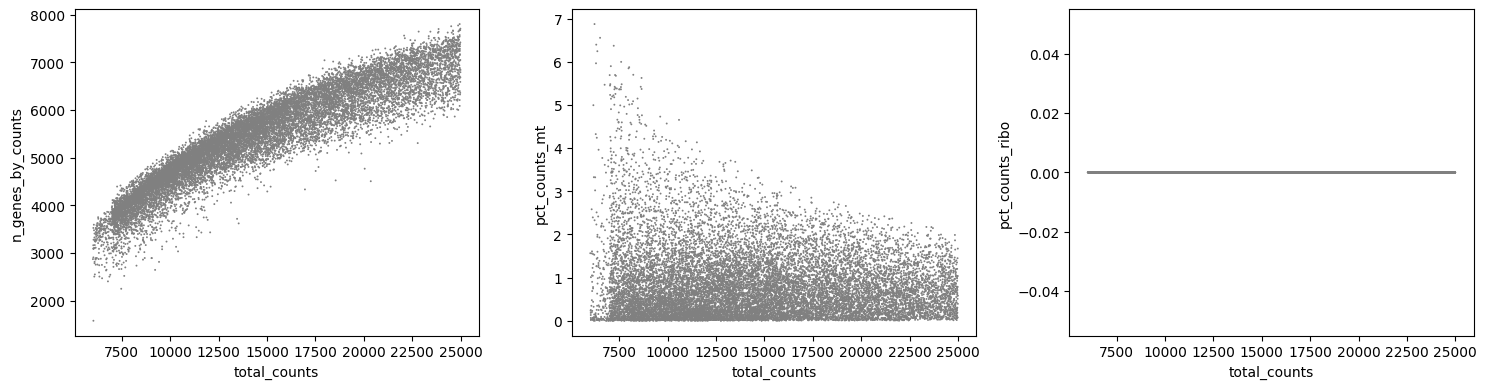

Original shape: (15894, 15993)
QC-filtered shape: (14495, 15991)
Number of cells removed by QC: 1399


In [ ]:
data1_norm = run_qc(data1)

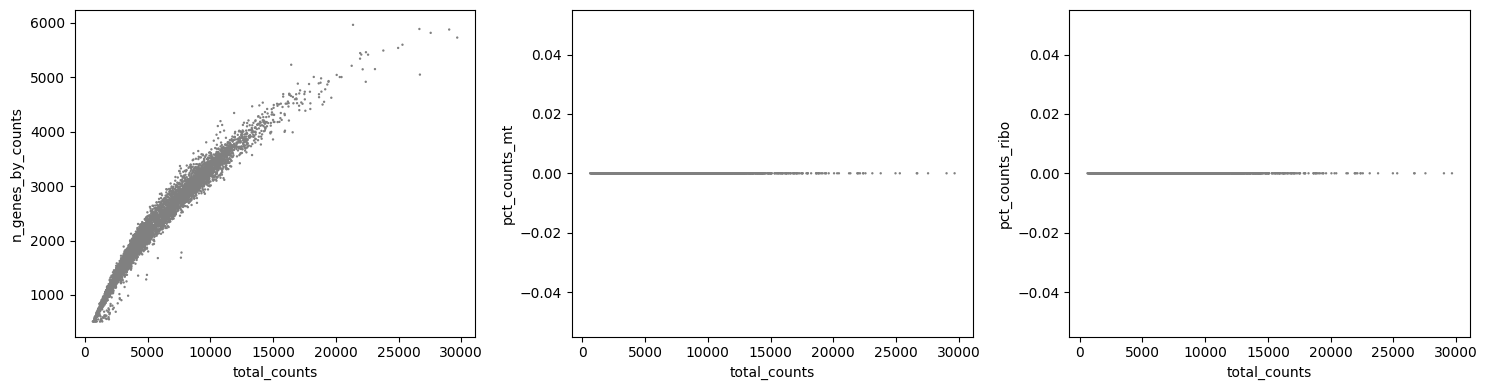

Original shape: (10309, 20104)
QC-filtered shape: (10288, 19759)
Number of cells removed by QC: 21


In [ ]:
cna_bench_norm = run_qc(cna_bench, min_genes=500, max_counts=20000, min_cells=3)

## **CNA identification tool**

Our method introduces several innovations and improvements of previous CNA inference tools that will allow successful inference on scRNAseq data.

1) Automatic within-sample reference baseline based on transcriptional profile clustering

While previous tools like inferCNV rely on an external, user-defined reference or an internal reference based on the average gene expression values globally (can be external as well from a separate dataset), our method will introduce an automatic reference cell selection based on unsupervised clustering. We will cluster the cells and calculate each cluster's average gene expression before comparing it to the mean expression of the other clusters combined. We can then calculate a z-score that indicates how much the cluster deviates from the rest of the population and use that difference to infer CNAs.

This selection process will hopefully minimize false positives that may occur from the tool calling a region a CNA insertion/deletion when it could be a transcriptional increase or decrease in gene expression. It will also capture any biological variability better than taking a global average gene expression, giving potentially a more refined detection methodology. This can be especially useful for highly heterogenous settings like pluripotent stem cells where the dataset may have no truly diploid cells to act as a baseline reference.

https://infercnvpy.readthedocs.io/en/latest/infercnv.html


### Unsupervised clustering of the datasets.

In [ ]:
!pip install scanpy scipy umap-learn leidenalg

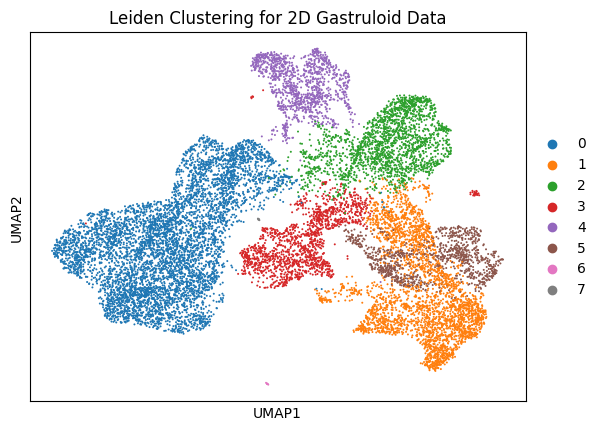

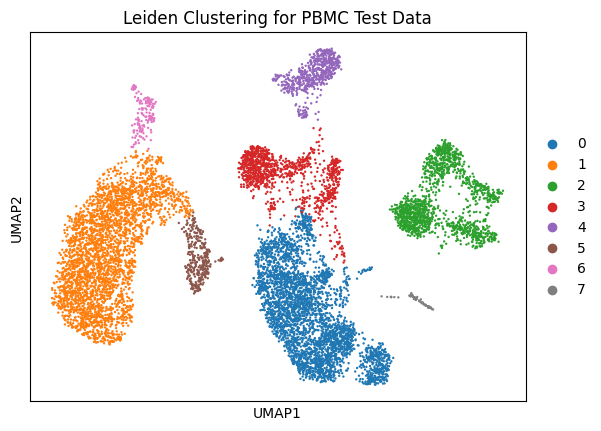

In [ ]:
def perform_clustering(adata, adata_name, resolution=0.1):
    np.random.seed(42)
    sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor="cell_ranger")
    adata_hvg = adata[:, adata.var["highly_variable"]].copy()

    sc.pp.pca(adata_hvg)
    sc.pp.neighbors(adata_hvg, n_neighbors=10, n_pcs=20)
    sc.tl.leiden(adata_hvg, resolution=resolution)
    adata.obs['leiden'] = adata_hvg.obs['leiden']
    sc.tl.umap(adata_hvg)

    sc.pl.umap(adata_hvg, color='leiden', title=f'Leiden Clustering for {adata_name}')

    return adata_hvg

data1_pca_norm = perform_clustering(data1_norm, adata_name = '2D Gastruloid Data')
cna_bench_pca_norm = perform_clustering(cna_bench_norm, adata_name = 'PBMC Test Data')

categories: 0, 1, 2, etc.
var_group_labels: B cell, Dendritic, Monocyte, etc.


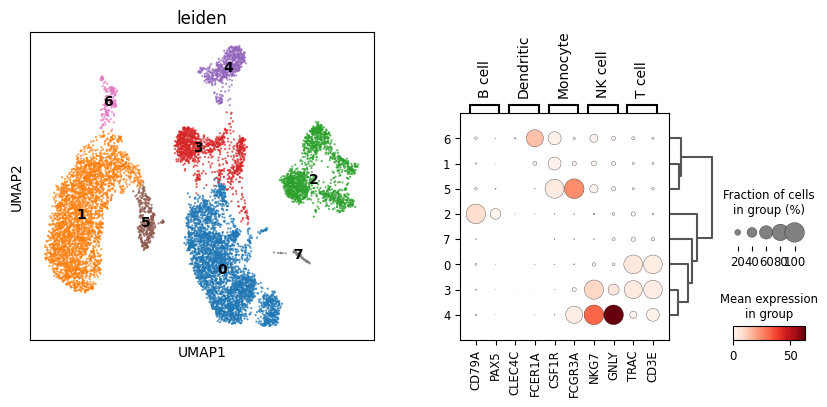

In [ ]:
marker_genes_broad_dict = {
    'B cell': ['CD79A', 'PAX5'],
    'Dendritic': ['CLEC4C', 'FCER1A'],
    'Monocyte': ['CSF1R', 'FCGR3A'],
    'NK cell': ['NKG7', 'GNLY'],
    'T cell': ['TRAC', 'CD3E'],
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), gridspec_kw={'wspace':0.25})
ax1_dict = sc.pl.umap(cna_bench_pca_norm,color=['leiden'], alpha=.75, s=10, legend_loc='on data', ax=ax1, show=False)
ax2_dict = sc.pl.dotplot(cna_bench_pca_norm, marker_genes_broad_dict, 'leiden', dendrogram=True,ax=ax2, show=False)
plt.show()

In [ ]:
cell_dict = {
    'Dendritic': ['6'],
    'CD14 Monocyte': ['5'],
    'CD16 Monocyte': ['1'],
    'B cell': ['2'],
    'Platelet': ['7'],
    'CD4 T cell': ['0'],
    'CD8 T cell': ['3'],
    'NK cell': ['4']
}

# Invert the dictionary: cluster → cell type
cluster_to_type = {cluster: celltype for celltype, clusters in cell_dict.items() for cluster in clusters}

# Apply mapping to create a new column
cna_bench_pca_norm.obs['cell_type'] = cna_bench_pca_norm.obs['leiden'].astype(str).map(cluster_to_type)


In [ ]:
print(data1_pca_norm.var_names[:20])


Index(['AADACL3', 'AASS', 'ABCA1', 'ABCA4', 'ABCC4', 'ABCC9', 'ABCG1', 'ABCG2',
       'ABRA', 'ACAT2', 'ACE', 'ACKR3', 'ACPP', 'ACSF2', 'ACSM4', 'ACTA1',
       'ACTA2', 'ACTC1', 'ACTG2', 'ACTN3'],
      dtype='object')


In [ ]:
data1_pca_norm.var_names = data1_pca_norm.var_names.str.extract(r'^([^ ]+)')[0]
data1_pca_norm.var_names_make_unique()

print(data1_pca_norm.var_names[:20])

data1_marker_genes = {
    'Epiblast-like': ['SOX2', 'NANOG', 'POU5F1'],
    'Primitive Streak (PS)': ['TBXT', 'EOMES', 'MIXL1'],
    'Nascent Mesoderm': ['MIXL1', 'RSPO3', 'TBX6'],
    'Paraxial Mesoderm': ['FOXC2', 'TBX6', 'DLL3'],
    'Lateral Plate Mesoderm': ['FOXF1', 'HAND1', 'TMEM88', 'NKX2-5'],
    'Connecting Stalk': ['TBX4', 'PITX1', 'ALCAM'],
    'Amnion-like': ['ISL1']
}


Index(['AADACL3', 'AASS', 'ABCA1', 'ABCA4', 'ABCC4', 'ABCC9', 'ABCG1', 'ABCG2',
       'ABRA', 'ACAT2', 'ACE', 'ACKR3', 'ACPP', 'ACSF2', 'ACSM4', 'ACTA1',
       'ACTA2', 'ACTC1', 'ACTG2', 'ACTN3'],
      dtype='object')


KeyError: "Could not find keys ['ALCAM', 'DLL3', 'EOMES', 'FOXC2', 'FOXF1', 'HAND1', 'ISL1', 'MIXL1', 'NANOG', 'NKX2-5', 'PITX1', 'POU5F1', 'RSPO3', 'SOX2', 'TBX4', 'TBX6', 'TBXT', 'TMEM88'] in columns of `adata.obs` or in adata.raw.var_names."

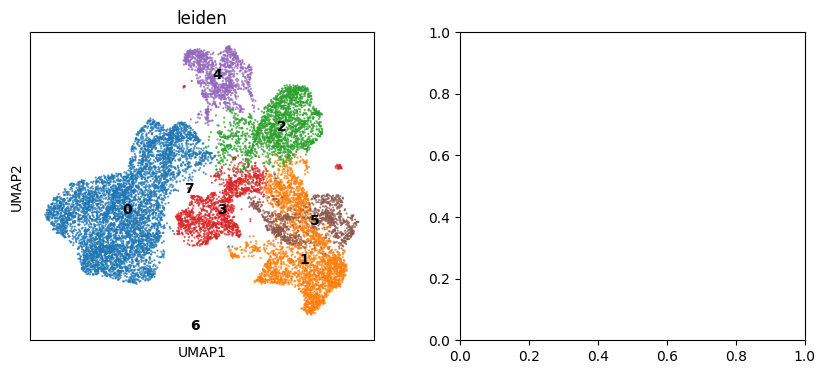

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), gridspec_kw={'wspace':0.25})
ax1_dict = sc.pl.umap(data1_pca_norm,color=['leiden'], alpha=.75, s=10, legend_loc='on data', ax=ax1, show=False)
ax2_dict = sc.pl.dotplot(data1_pca_norm, data1_marker_genes, 'leiden', dendrogram=True,ax=ax2, show=False)
plt.show()

In [ ]:
def get_reference_cluster(adata, group_key='leiden'):
    available_clusters = sorted(adata.obs[group_key].astype(str).unique())
    print("Available clusters:")
    for clust in available_clusters:
        print(f" - {clust}")
    print("Or enter 'none' to use all cells as the reference baseline.")

    selected_cluster = input("Enter the cluster label to use as reference (e.g., '0' or 'none'): ").strip().lower()

    if selected_cluster == 'none':
        return None
    elif selected_cluster in available_clusters:
        return selected_cluster
    else:
        raise ValueError(f"Cluster '{selected_cluster}' not found. Choose from: {available_clusters} or 'none'")


In [ ]:
reference_cluster = get_reference_cluster(cna_bench_pca_norm)
selected_cluster = reference_cluster

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import issparse
from scipy.stats import zscore
from scipy.ndimage import uniform_filter1d

def infer_cnv_plot(
    adata,
    group_key='leiden',
    reference_group=reference_cluster,  # Optional: set to None to use all cells as baseline
    max_cells_per_group=250,
    smooth=True,
    zscore_clip=2.5
):
    # Get expression matrix
    X = adata.X.toarray() if issparse(adata.X) else adata.X.copy()

    # Gene ordering
    genes = adata.var.copy()
    if 'gene_id' not in genes.columns:
      genes['gene_id'] = genes.index
    genes = genes.reset_index()
    genes_sorted = genes.sort_values(by=['chromosome', 'start'])
    gene_order = genes_sorted['gene_id'].values
    gene_idx = adata.var_names.get_indexer(gene_order)
    X = X[:, gene_idx]

    # Reference group baseline (for mean and std)
    if reference_group is not None:
        ref_mask = adata.obs[group_key].astype(str) == reference_group
        X_ref = X[ref_mask.values]
        ref_mean = np.mean(X_ref, axis=0)
        ref_std = np.std(X_ref, axis=0)
        X = (X - ref_mean) / (ref_std + 1e-6)
    else:
        # Z-score across cells (per gene)
        X = zscore(X, axis=0, nan_policy='omit')

    # Clip Z-scores
    X = np.clip(X, -zscore_clip, zscore_clip)

    # Optional smoothing across genes
    if smooth:
        X = uniform_filter1d(X, size=10, axis=1)

    # Get cell groupings
    cell_groups = adata.obs[group_key].astype(str)
    group_df = pd.DataFrame({'group': cell_groups, 'cell_idx': np.arange(len(cell_groups))})
    group_df = group_df.sort_values('group')

    # Sample and stack per group
    X_rows = []
    row_colors = []
    group_sample_counts = []
    palette = sns.color_palette('tab20', n_colors=group_df['group'].nunique())
    group_color_map = {g: palette[i] for i, g in enumerate(sorted(group_df['group'].unique()))}

    for group in sorted(group_df['group'].unique()):
        members = group_df[group_df['group'] == group]
        selected = members.sample(n=min(max_cells_per_group, len(members)), random_state=42)
        X_rows.append(X[selected['cell_idx'].values])
        row_colors.extend([group_color_map[group]] * len(selected))
        group_sample_counts.append(len(selected))

    X_plot = np.vstack(X_rows)

    # === PLOTTING ===
    fig, ax = plt.subplots(figsize=(22, 10))
    sns.heatmap(
        X_plot,
        cmap='bwr',
        center=0,
        xticklabels=False,
        yticklabels=False,
        cbar_kws={'label': 'Z-score (relative to ref group)' if reference_group else 'Z-score across cells'},
        ax=ax
    )

    ax.set_title("inferCNV-style Heatmap: Genes ordered by genome, Cells grouped by " + group_key)
    ax.set_xlabel("Genomic Region (Chromosomes)")
    ax.set_ylabel("Cells (Grouped by " + group_key + ")")

    # === CHROMOSOME X-TICK ANNOTATIONS ===
    gene_chr_series = genes_sorted['chromosome'].values
    chr_boundaries = []
    chr_labels = []
    current_chr = gene_chr_series[0]

    for i, chr in enumerate(gene_chr_series):
        if chr != current_chr:
            chr_boundaries.append(i)
            chr_labels.append(current_chr)
            current_chr = chr
    chr_boundaries.append(len(gene_chr_series))
    chr_labels.append(current_chr)

    for pos in chr_boundaries:
        ax.axvline(x=pos, color='black', linestyle='--', linewidth=0.4)

    chr_midpoints = [(chr_boundaries[i] + chr_boundaries[i + 1]) // 2 for i in range(len(chr_boundaries) - 1)]
    ax.set_xticks(chr_midpoints)
    ax.set_xticklabels(chr_labels[:-1], rotation=90)

    group_edges = np.cumsum([0] + group_sample_counts)
    group_mids = [(group_edges[i] + group_edges[i + 1]) // 2 for i in range(len(group_sample_counts))]

    ax.set_yticks(group_mids)
    if 'cell_type' in adata.obs.columns and group_key == 'leiden':
        ytick_labels = [adata.obs.loc[adata.obs[group_key] == g, 'cell_type'].dropna().unique()[0]
                        if len(adata.obs.loc[adata.obs[group_key] == g, 'cell_type'].dropna()) > 0 else g
                        for g in sorted(group_df['group'].unique())]
    else:
        ytick_labels = sorted(group_df['group'].unique())

    ax.set_yticklabels(ytick_labels, rotation=0)


    plt.tight_layout()
    plt.show()


In [ ]:
data1_final = infer_cnv_plot(data1_pca_norm)

In [ ]:
cna_bench_final = infer_cnv_plot(cna_bench_pca_norm)

We will print out the anndata as a table to show the various required output such as start, stop, chromosome and type as well as grouping by leidin clustering.

In [ ]:
print(data1.var.head(30))

In [ ]:
from scipy.sparse import issparse
from scipy.stats import zscore
from scipy.ndimage import uniform_filter1d

def compute_cna_matrix(adata, reference_group=reference_cluster, group_key='leiden', smooth=True, zscore_clip=2.5):

    # Convert matrix to dense if needed
    X = adata.X.toarray() if issparse(adata.X) else adata.X.copy()

    # Gene ordering
    genes = adata.var.copy()
    if 'gene_id' not in genes.columns:
      genes['gene_id'] = genes.index
    genes_sorted = genes.sort_values(by=['chromosome', 'start'])
    gene_order = genes_sorted['gene_id'].values
    gene_idx = adata.var_names.get_indexer(gene_order)
    X = X[:, gene_idx]

    # Compute reference-based Z-score
    if reference_group is not None:
        ref_mask = adata.obs[group_key].astype(str) == reference_group
        X_ref = X[ref_mask.values]
        ref_mean = np.mean(X_ref, axis=0)
        ref_std = np.std(X_ref, axis=0)
        X_z = (X - ref_mean) / (ref_std + 1e-6)
    else:
        X_z = zscore(X, axis=0, nan_policy='omit')  # Z-score per gene across cells

    # Optional smoothing
    if smooth:
        X_z = uniform_filter1d(X_z, size=10, axis=1)

    # Clip extreme values
    X_z = np.clip(X_z, -zscore_clip, zscore_clip)

    return X_z, genes_sorted


In [ ]:
def extract_cna_calls(X_z, genes, cluster_series, cell_type_series=None, threshold=0.5, max_calls=1000):
    cna_calls = []

    for cell_idx in range(X_z.shape[0]):
        cluster = cluster_series.iloc[cell_idx]
        cell_type = cell_type_series.iloc[cell_idx] if cell_type_series is not None else 'Unknown'
        for gene_idx, score in enumerate(X_z[cell_idx]):
            if abs(score) >= threshold:
                status = 'gain' if score > 0 else 'loss'
                cna_calls.append({
                    'cell_idx': cell_idx,
                    'cluster': cluster,
                    'chromosome': genes.iloc[gene_idx]['chromosome'],
                    'start': genes.iloc[gene_idx]['start'],
                    'end': genes.iloc[gene_idx]['end'],
                    'gene_id': genes.iloc[gene_idx]['gene_id'],
                    'cell_type': cell_type,
                    'z_score': round(score, 2),
                    'cna': status
                })
            if len(cna_calls) >= max_calls:
                break
        if len(cna_calls) >= max_calls:
            break

    return pd.DataFrame(cna_calls)[['cell_idx', 'gene_id', 'chromosome', 'start', 'end', 'cna', 'cluster', 'cell_type', 'z_score']]


In [ ]:
print(cna_bench_pca_norm.var.columns)


In [ ]:
cna_bench_X_z, cna_bench_genes_sorted = compute_cna_matrix(cna_bench_pca_norm, reference_group='0', group_key='leiden')
cna_bench_cell_clusters = cna_bench_pca_norm.obs['leiden']
cna_bench_table = extract_cna_calls(
    X_z= cna_bench_X_z,
    genes= cna_bench_genes_sorted,
    cluster_series=cna_bench_pca_norm.obs['leiden'],
    cell_type_series=cna_bench_pca_norm.obs['cell_type']
)

print(cna_bench_table)
print(cna_bench_table[cna_bench_table['cna'] == 'loss'])
print(cna_bench_table[cna_bench_table['cell_type'] == 'Dendritic'])


In [ ]:
print(cna_bench_pca_norm.obs['cell_type'].unique())


In [ ]:
data1_X_z, data1_genes_sorted = compute_cna_matrix(data1_pca_norm, reference_group='0', group_key='leiden')
data1_cell_clusters = data1_pca_norm.obs['leiden']
data1_table = extract_cna_calls(data1_X_z, data1_genes_sorted, data1_cell_clusters)

print(data1_table)
print(data1_table[data1_table['cna'] == 'loss'])

NameError: name 'compute_cna_matrix' is not defined

# Task 2A.
We are going to analyze the accuracy of this methodology on the test simulated data. We will use the cna_bench_X_z we generated earlier to get the mean Z-scores to compare to the simulated regions.


In [ ]:
cna_bench_X_z

In [ ]:
simulated_regions = [
    {'chromosome': 'X', 'start': 106533974, 'end': 112956833, 'cn': 4},  # gain
    {'chromosome': '22', 'start': 19807132, 'end': 29743868, 'cn': 0},   # loss
    {'chromosome': '6', 'start': 25435484, 'end': 35035259, 'cn': 1},    # loss
    {'chromosome': 'X', 'start': 100000000, 'end': 115000000, 'cn': 4},
]


In [ ]:
cna_bench.obs.head(10)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_and_plot_mean_zscore_in_region(adata, X_z, chromosome, start, end, label=None):

    region_genes = adata.var[
        (adata.var['chromosome'] == chromosome) &
        (adata.var['start'] >= start) &
        (adata.var['start'] <= end)
    ].index

    gene_indices = adata.var_names.get_indexer(region_genes)
    if len(region_genes) == 0:
        print(f"No genes found in region {chromosome}:{start}-{end}")
        return np.full(adata.n_obs, np.nan), []

    mean_signal = np.nanmean(X_z[:, gene_indices], axis=1)

    # Plot histogram
    plt.hist(mean_signal, bins=50)
    region_label = label or f"{chromosome}:{start}-{end}"
    plt.title(f"Z-score mean in {region_label} region")
    plt.xlabel("Mean Z-score")
    plt.ylabel("Number of Cells")
    plt.tight_layout()
    plt.show()

    return mean_signal, list(region_genes)


In [ ]:
for region in simulated_regions:
    compute_and_plot_mean_zscore_in_region(
        adata=cna_bench_pca_norm,
        X_z=cna_bench_X_z,
        chromosome=region['chromosome'],
        start=region['start'],
        end=region['end'],
        label=f"Chr{region['chromosome']} CN {region['cn']}"
    )


The reasons why the ChrX has NaN values within the simulated region is because the methodology did not detect genes in that simulated loss region of the ChrX. We can widen the window around to capture nearby genes and see that there is a wider spread around the positive mean Z-scores compared to the other two simulated loss chromosome regions.

In [ ]:
print(cna_bench_pca_norm.var[cna_bench_pca_norm.var['chromosome'] == 'X'].sort_values('start').head(10))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_zscore_cnv_inference(adata, z_matrix, chrom, start, end, label='CNV',
                                   pos_thresh=0.5, neg_thresh=-0.5, verbose=True):

    # Get relevant genes
    region_genes = adata.var[
        (adata.var['chromosome'] == chrom) &
        (adata.var['start'] >= start) &
        (adata.var['start'] <= end)
    ].index

    if len(region_genes) == 0:
        print(f"No genes found in region {chrom}:{start}-{end}")
        return None

    # Extract Z-score matrix for region
    gene_indices = adata.var_names.get_indexer(region_genes)
    region_z = z_matrix[:, gene_indices]
    mean_signals = np.nanmean(region_z, axis=1)

    # Parse simulated CNVs
    sim_cnvs = adata.obs['simulated_cnvs'].fillna('')
    region_str = f"{chrom}:{start}-{end}"
    y_true = []
    for sim in sim_cnvs:
        if region_str in sim:
            if '(CN 0)' in sim or '(CN 1)' in sim:
                y_true.append('loss')
            elif '(CN 4)' in sim:
                y_true.append('gain')
            else:
                y_true.append('neutral')
        else:
            y_true.append('neutral')

    # Convert mean signals to categorical predictions
    y_pred = []
    for score in mean_signals:
        if score > pos_thresh:
            y_pred.append('gain')
        elif score < neg_thresh:
            y_pred.append('loss')
        else:
            y_pred.append('neutral')

    # Classification report
    report = classification_report(y_true, y_pred, labels=['gain', 'loss', 'neutral'], output_dict=True)
    report_df = pd.DataFrame(report).T

    if verbose:
        print(f"\nPerformance on {label} ({region_str}):")
        print(classification_report(y_true, y_pred, labels=['gain', 'loss', 'neutral']))

        cm = confusion_matrix(y_true, y_pred, labels=['gain', 'loss', 'neutral'])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['gain', 'loss', 'neutral'],
                    yticklabels=['gain', 'loss', 'neutral'])
        plt.title(f'Confusion Matrix - {label}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()

    return pd.DataFrame({
        'cell': adata.obs_names,
        'mean_signal': mean_signals,
        'true_label': y_true,
        'pred_label': y_pred
    })


In [ ]:
result_df = evaluate_zscore_cnv_inference(
    adata=cna_bench_pca_norm,
    z_matrix=cna_bench_X_z,
    chrom='22',
    start=19807132,
    end=29743868,
    label='Chr22 CNV',
    pos_thresh=1,
    neg_thresh=0
)


In [ ]:
result_df = evaluate_zscore_cnv_inference(
    adata=cna_bench_pca_norm,
    z_matrix=cna_bench_X_z,
    chrom='6',
    start=25435484,
    end=35035259,
    label='Chr6 CNV',
    pos_thresh=1.0,
    neg_thresh=0
)


Next we will compare this methodology to infercnv tool.


In [ ]:
# Install necessary packages
!apt-get install -y r-base
!R -e "install.packages('BiocManager', repos='http://cran.us.r-project.org')"
!R -e "BiocManager::install('infercnv')"
!pip install anndata pandas pybiomart

# Load .h5ad
import anndata
import pandas as pd
adata = anndata.read_h5ad('/content/drive/MyDrive/final/cna_bench_cnv.h5ad')

# Label all cells as one group (pseudo-reference)
adata.obs['cell_group'] = 'all_cells'

# Save annotations file (no header)
adata.obs[['cell_group']].to_csv('/content/annotations.txt', sep='\t', header=False)

# Save expression matrix (genes as rows, cells as columns)
expr_df = pd.DataFrame(adata.X.T.toarray(), index=adata.var_names, columns=adata.obs_names)
expr_df.to_csv('/content/expression_matrix.txt', sep='\t')

In [ ]:

# Fetch gene coordinates from Ensembl BioMart
from pybiomart import Dataset

dataset = Dataset(name='hsapiens_gene_ensembl', host='https://www.ensembl.org')
gene_list = adata.var_names.tolist()

# Query Ensembl
coords = dataset.query(attributes=['ensembl_gene_id', 'chromosome_name', 'start_position'],
                       filters={'ensembl_gene_id': gene_list})

# Format for inferCNV
coords.columns = ['gene', 'chr', 'start']
coords = coords[coords['chr'].isin([str(i) for i in range(1, 23)] + ['X', 'Y'])]

# Save gene_order.txt
coords.to_csv('/content/gene_order.txt', sep='\t', index=False, header=False)


In [ ]:
# Run this cell as an R block using %%R

%%R

library(infercnv)

infercnv_obj <- CreateInfercnvObject(
    raw_counts_matrix = "/content/expression_matrix.txt",
    annotations_file = "/content/annotations.txt",
    delim = "\t",
    gene_order_file = "/content/gene_order.txt",
    ref_group_names = c("all_cells")
)

infercnv_obj <- infercnv::run(
    infercnv_obj,
    cutoff = 1,
    out_dir = "/content/infercnv_output",
    cluster_by_groups = TRUE,
    denoise = TRUE,
    HMM = TRUE
)


In [ ]:
import anndata

!apt-get install -y r-base
!R -e "install.packages('BiocManager', repos='http://cran.us.r-project.org')"
!R -e "BiocManager::install('infercnv')"
!pip install anndata pandas

adata = anndata.read_h5ad('/content/drive/MyDrive/final/cna_bench_cnv.h5ad')

adata.obs['cell_group'] = 'all_cells'

adata.obs[['cell_group']].to_csv('/content/annotations.txt', sep='\t', header=False)

expr_df = pd.DataFrame(adata.X.T.toarray(), index=adata.var_names, columns=adata.obs_names)
expr_df.to_csv('/content/expression_matrix.txt', sep='\t')

gene_order = pd.DataFrame({
    'gene': adata.var_names,
    'chr': adata.var.get('chromosome', pd.Series(['1'] * adata.shape[1])),  # Use real values if you have them
    'start': adata.var.get('start', pd.Series(range(1, adata.shape[1] + 1)))
})
gene_order.to_csv('/content/gene_order.txt', sep='\t', index=False, header=False)


In [ ]:
!pip install -q rpy2

In [ ]:
%load_ext rpy2.ipython

In [ ]:
!apt-get update
!apt-get install -y libgfortran5 libgfortran-10-dev libcurl4-openssl-dev libxml2-dev libssl-dev
!apt-get install -y libopenblas-dev liblapack-dev libzmq3-dev libjpeg-dev libpng-dev jags

In [ ]:
# R magic cell
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("infercnv")


In [ ]:
%%R
library(infercnv)

In [ ]:
# Filter only genes that have required metadata
valid_genes = cna_bench.var.dropna(subset=['gene_ids', 'chromosome', 'start'])
valid_gene_ids = valid_genes['gene_ids'].values

# Subset counts and var
cna_bench_filtered = cna_bench[:, cna_bench.var['gene_ids'].isin(valid_gene_ids)].copy()

# Prepare expression matrix
expr_matrix_path = "/content/drive/MyDrive/final/infercnv_input/expression_matrix.txt"
counts_df = pd.DataFrame(
    cna_bench_filtered.X.toarray() if issparse(cna_bench_filtered.X) else cna_bench_filtered.X,
    index=cna_bench_filtered.obs_names,
    columns=cna_bench_filtered.var['gene_ids']
)
counts_df.T.to_csv(expr_matrix_path, sep="\t")

# Prepare gene order file
gene_order_path = "/content/drive/MyDrive/final/infercnv_input/gene_order.txt"
gene_order_df = cna_bench_filtered.var[['gene_ids', 'chromosome', 'start']].dropna()
gene_order_df.columns = ['gene_id', 'chr', 'start']
gene_order_df = gene_order_df.astype({'chr': str, 'start': int})
gene_order_df.to_csv(gene_order_path, sep='\t', index=False, header=False)

# Reuse annotations if already made


In [ ]:
%%R
library(infercnv)

infercnv_obj <- CreateInfercnvObject(
    raw_counts_matrix = expr_matrix_path,
    annotations_file = annotations_path,
    delim = "\t",
    gene_order_file = gene_order_path,
    ref_group_names = NULL
)

infercnv_obj <- infercnv::run(
    infercnv_obj,
    cutoff=0.1,
    out_dir=infercnv_out_dir,
    cluster_by_groups=TRUE,
    denoise=TRUE,
    HMM=FALSE
)


In [ ]:
import pandas as pd

# Load gene order file
gene_order = pd.read_csv('/content/drive/MyDrive/final/infercnv_input/gene_order.txt', sep='\t', header=None)

# View the first few rows
print(gene_order.head())

# Print shape (rows, columns)
print("Shape:", gene_order.shape)


In [ ]:
import os
import pandas as pd
import scanpy as sc
from scipy.sparse import issparse

# === Paths ===
base_dir = '/content/drive/MyDrive/final/infercnv_input'
os.makedirs(base_dir, exist_ok=True)

expr_matrix_path = f"{base_dir}/expression_matrix.txt"
annotations_path = f"{base_dir}/annotations.txt"
gene_order_path = f"{base_dir}/gene_order.txt"
infercnv_out_dir = f"{base_dir}/infercnv_output"

# === Load data ===
adata = sc.read_h5ad('/content/drive/MyDrive/final/PBMC_simulated_cnas_041025.h5ad')  # your input
adata.var_names_make_unique()

# === Export expression matrix ===
counts_df = pd.DataFrame(
    adata.X.toarray() if issparse(adata.X) else adata.X,
    index=adata.obs_names,
    columns=adata.var_names
)
counts_df.T.to_csv(expr_matrix_path, sep="\t")

# === Export annotations ===
annotations = adata.obs.copy()
if 'cell_type' not in annotations.columns:
    annotations['cell_type'] = 'unknown'
else:
    annotations['cell_type'] = annotations['cell_type'].astype(str).fillna('unknown')

annotations = annotations.reset_index()[['index', 'cell_type']]
annotations.columns = ['cell', 'group']
annotations.to_csv(annotations_path, sep="\t", index=False, header=False)

# === Export gene order ===
gene_order = adata.var[['gene_ids', 'chromosome', 'start', 'end']].dropna()
gene_order.columns = ['gene_id', 'chr', 'start', 'end']
gene_order = gene_order.astype({'chr': str, 'start': int, 'end': int})
gene_order.to_csv(gene_order_path, sep='\t', index=False, header=False)


In [ ]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("infercnv")

# Load the library
library(infercnv)

# === Set file paths ===
expr_matrix_path <- "/content/drive/MyDrive/final/infercnv_input/expression_matrix.txt"
annotations_path <- "/content/drive/MyDrive/final/infercnv_input/annotations.txt"
gene_order_path <- "/content/drive/MyDrive/final/infercnv_input/gene_order.txt"
infercnv_out_dir <- "/content/drive/MyDrive/final/infercnv_input/infercnv_output"

# === Run inferCNV ===
infercnv_obj <- CreateInfercnvObject(
    raw_counts_matrix = expr_matrix_path,
    annotations_file = annotations_path,
    delim = "\t",
    gene_order_file = gene_order_path,
    ref_group_names = NULL  # or e.g., c("B_cell", "T_cell") if you have a reference
)

infercnv_obj <- infercnv::run(
    infercnv_obj,
    cutoff=0.1,
    out_dir=infercnv_out_dir,
    cluster_by_groups=TRUE,
    denoise=TRUE,
    HMM=FALSE
)


In [ ]:
import os
os.makedirs('/content/drive/MyDrive/final/infercnv_input', exist_ok=True)
expr_matrix_path = "/content/drive/MyDrive/final/infercnv_input/expression_matrix.txt"

from scipy.sparse import issparse  # make sure this is at the top

# Then use this instead:
counts_df = pd.DataFrame(
    cna_bench.X.toarray() if issparse(cna_bench.X) else cna_bench.X,
    index=cna_bench.obs_names,
    columns=cna_bench.var_names
)

# Transpose (inferCNV expects genes as rows)
counts_df.T.to_csv(expr_matrix_path, sep="\t")
annotations_path = "/content/drive/MyDrive/final/infercnv_input/annotations.txt"

annotations = cna_bench.obs[['cell_type']].copy() if 'cell_type' in cna_bench.obs.columns else pd.DataFrame(index=cna_bench.obs_names)
annotations['cell_type'] = annotations['cell_type'].astype(str).fillna('unknown')
annotations = annotations.reset_index()
annotations.columns = ['cell', 'group']

annotations.to_csv(annotations_path, sep="\t", index=False, header=False)
gene_order_path = "/content/drive/MyDrive/final/infercnv_input/gene_order.txt"

gene_order_df = cna_bench.var[['gene_ids', 'chromosome', 'start']].dropna()
gene_order_df.columns = ['gene_id', 'chr', 'start']
gene_order_df = gene_order_df.astype({'chr': str, 'start': int})
gene_order_df.to_csv('/content/drive/MyDrive/final/infercnv_input/gene_order.txt', sep='\t', index=False, header=False)

# Share paths with R
%R -i expr_matrix_path -i annotations_path -i gene_order_path -i infercnv_out_dir


In [ ]:
%R -i expr_matrix_path -i annotations_path -i gene_order_path -i infercnv_out_dir


In [ ]:
%%R
library(infercnv)

infercnv_obj <- CreateInfercnvObject(
    raw_counts_matrix = expr_matrix_path,
    annotations_file = annotations_path,
    delim = "\t",
    gene_order_file = gene_order_path,
    ref_group_names = NULL  # or specify control group if known
)

infercnv_obj <- infercnv::run(
    infercnv_obj,
    cutoff=0.1,
    out_dir=infercnv_out_dir,
    cluster_by_groups=TRUE,
    denoise=TRUE,
    HMM=FALSE
)


# Task 3


We have selected the following three other PSC datasets to run pre-processing steps and visualize/generate tables for.

Data2: H9 hESC cell line, transcriptional dynamics of pluripotent stem cell derived endothelial cell differentiation revealed by single cell RNA-Seq.

In [ ]:
data2 = sc.read_10x_h5("/content/drive/MyDrive/GSM3814885_day0_filtered_gene_bc_matrices_h5.h5")

In [ ]:
print(data2.var_names[:20])


In [ ]:
print(data2.var.head())

In [ ]:
def add_gene_coordinates_from_ensembl(adata):
    from pybiomart import Server

    # Connect to BioMart server
    server = Server(host='http://www.ensembl.org')
    dataset = server.marts['ENSEMBL_MART_ENSEMBL'].datasets['hsapiens_gene_ensembl']

    # Extract Ensembl IDs from adata.var
    gene_ids = adata.var['gene_ids'].tolist()

    # Query BioMart for relevant fields
    results = dataset.query(attributes=[
        'ensembl_gene_id',
        'external_gene_name',
        'chromosome_name',
        'start_position',
        'end_position'
    ])

    # Format results
    results.columns = ['gene_id', 'gene_symbol', 'chromosome', 'start', 'end']
    results = results.drop_duplicates('gene_id')
    results = results.set_index('gene_id')

    # Map back to AnnData
    adata.var['gene_symbol'] = adata.var['gene_ids'].map(results['gene_symbol'])
    adata.var['chromosome'] = adata.var['gene_ids'].map(results['chromosome'])
    adata.var['start'] = adata.var['gene_ids'].map(results['start'])
    adata.var['end'] = adata.var['gene_ids'].map(results['end'])

    return adata


In [ ]:
add_gene_coordinates_from_ensembl(data2)

In [ ]:
print(data2.var.head(30))

In [ ]:
def run_qc(adata, min_genes=2000, max_counts=50000, min_cells=3, max_pct_mt=7, max_pct_ribo=45):
    adata_qc = adata.copy()

    adata_qc.var['mt'] = adata_qc.var_names.str.upper().str.startswith('MT-')
    ribo_prefix = ('RPS', 'RPL')
    adata_qc.var['ribo'] = adata_qc.var_names.str.upper().str.startswith(ribo_prefix)

    sc.pp.calculate_qc_metrics(adata_qc, qc_vars=['mt', 'ribo'], inplace=True)

    # Plot QC metrics
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    sc.pl.scatter(adata_qc, x='total_counts', y='n_genes_by_counts', ax=axs[0], show=False)
    sc.pl.scatter(adata_qc, x='total_counts', y='pct_counts_mt', ax=axs[1], show=False)
    sc.pl.scatter(adata_qc, x='total_counts', y='pct_counts_ribo', ax=axs[2], show=False)
    plt.tight_layout()
    plt.show()

    # Apply filters
    sc.pp.filter_cells(adata_qc, min_genes=min_genes)
    sc.pp.filter_cells(adata_qc, max_counts=max_counts)
    sc.pp.filter_genes(adata_qc, min_cells=min_cells)

    adata_qc.raw = adata_qc

    # Remove cells with high mitochondrial or ribosomal content
    adata_qc = adata_qc[adata_qc.obs['pct_counts_mt'] < max_pct_mt, :]
    adata_qc = adata_qc[adata_qc.obs['pct_counts_ribo'] < max_pct_ribo, :]

    # Normalize and log1p transform
    sc.pp.normalize_total(adata_qc, target_sum=1e4)
    sc.pp.log1p(adata_qc)

    print("Original shape:", adata.shape)
    print("QC-filtered shape:", adata_qc.shape)
    removed_cells = adata.shape[0] - adata_qc.shape[0]
    print(f"Number of cells removed by QC: {removed_cells}")

    return adata_qc


In [ ]:
data2_norm = run_qc(data2)

In [ ]:
data2_pca_norm = perform_clustering(data2_norm, adata_name='hESC9 iPSC Data Testing', resolution = 1.0)

reference_cluster = get_reference_cluster(data2_pca_norm)
selected_cluster = reference_cluster  # optionally override

data2_final = infer_cnv_plot(data2_pca_norm)

data2_X_z, data2_genes_sorted = compute_cna_matrix(
    data2_pca_norm,
    reference_group=str(reference_cluster),
    group_key='leiden'
)

data2_cell_clusters = data2_pca_norm.obs['leiden']


In [ ]:
print(data2.var.head(30))

In [ ]:
data2_cna_table = extract_cna_calls(
    X_z=data2_X_z,
    genes=data2_genes_sorted,
    cluster_series=data2_pca_norm.obs['leiden'],
    cell_type_series=data2_pca_norm.obs.get('cell_type'),  # handles missing gracefully
    threshold=0.5,             # or whatever you want
    max_calls=10000            # increase if needed
)


In [ ]:
# Show and save results
print(data2_cna_table.head())
data2_cna_table.to_csv("data2_cna_calls.tsv", sep='\t', index=False)


In [ ]:

print(data2_cna_table[data2_cna_table['cna'] == 'gain']
      .sort_values(by='z_score', ascending=False)
      .head())
print(data2_cna_table[data2_cna_table['cna'] == 'loss']
      .sort_values(by='z_score', ascending=True)
      .head())


For the next dataset, we looked at iPSC derived hypothalamic neurons between BSN+/- and WT since these also were discovered to have very small CNAs later and we could use this for better augmenting as well (Task 2B).

In [ ]:
data4 = sc.read_10x_h5("/content/drive/MyDrive/final/GSM7779486_SLX-22979.SITTE2.filtered_feature_bc_matrix.h5")

In [ ]:
print(data4.var.head())

In [ ]:
data4.var['gene_id'] = data4.var['gene_ids']


In [ ]:
add_gene_coordinates_from_ensembl(data4)

In [ ]:
def run_qc(adata, min_genes=250, max_counts=15000, min_cells=3, max_pct_mt=5, max_pct_ribo=10):
    adata_qc = adata.copy()

    adata_qc.var['mt'] = adata_qc.var_names.str.upper().str.startswith('MT-')
    ribo_prefix = ('RPS', 'RPL')
    adata_qc.var['ribo'] = adata_qc.var_names.str.upper().str.startswith(ribo_prefix)

    sc.pp.calculate_qc_metrics(adata_qc, qc_vars=['mt', 'ribo'], inplace=True)

    # Plot QC metrics
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    sc.pl.scatter(adata_qc, x='total_counts', y='n_genes_by_counts', ax=axs[0], show=False)
    sc.pl.scatter(adata_qc, x='total_counts', y='pct_counts_mt', ax=axs[1], show=False)
    sc.pl.scatter(adata_qc, x='total_counts', y='pct_counts_ribo', ax=axs[2], show=False)
    plt.tight_layout()
    plt.show()

    # Apply filters
    sc.pp.filter_cells(adata_qc, min_genes=min_genes)
    sc.pp.filter_cells(adata_qc, max_counts=max_counts)
    sc.pp.filter_genes(adata_qc, min_cells=min_cells)

    adata_qc.raw = adata_qc

    # Remove cells with high mitochondrial or ribosomal content
    adata_qc = adata_qc[adata_qc.obs['pct_counts_mt'] < max_pct_mt, :]
    adata_qc = adata_qc[adata_qc.obs['pct_counts_ribo'] < max_pct_ribo, :]

    # Normalize and log1p transform
    sc.pp.normalize_total(adata_qc, target_sum=1e4)
    sc.pp.log1p(adata_qc)

    print("Original shape:", adata.shape)
    print("QC-filtered shape:", adata_qc.shape)
    removed_cells = adata.shape[0] - adata_qc.shape[0]
    print(f"Number of cells removed by QC: {removed_cells}")

    return adata_qc


In [ ]:
data4_norm = run_qc(data4)

In [ ]:
print(data4.var.head(30))

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import issparse
from scipy.stats import zscore
from scipy.ndimage import uniform_filter1d

def infer_cnv_plot_fixed(
    adata,
    group_key='leiden',
    reference_group=None,
    max_cells_per_group=250,
    smooth=True,
    zscore_clip=2.5
):
    # === Matrix extraction and gene ordering ===
    X = adata.X.toarray() if issparse(adata.X) else adata.X.copy()
    genes = adata.var.copy()
    if 'gene_id' not in genes.columns:
        genes['gene_id'] = genes.index

    genes_sorted = genes.sort_values(by=['chromosome', 'start'])
    gene_order = genes_sorted.index
    gene_idx = adata.var_names.get_indexer(gene_order)
    X = X[:, gene_idx]

    # === Z-score normalization ===
    if reference_group is not None:
        ref_mask = adata.obs[group_key].astype(str) == reference_group
        X_ref = X[ref_mask.values]
        ref_mean = np.mean(X_ref, axis=0)
        ref_std = np.std(X_ref, axis=0)
        X = (X - ref_mean) / (ref_std + 1e-6)
    else:
        X = zscore(X, axis=0, nan_policy='omit')

    X = np.clip(X, -zscore_clip, zscore_clip)
    if smooth:
        X = uniform_filter1d(X, size=10, axis=1)

    # === Prepare group sampling ===
    groups = adata.obs[group_key].astype(str)
    group_df = pd.DataFrame({'group': groups, 'cell_idx': np.arange(len(groups))})
    group_df = group_df.sort_values('group')

    X_rows = []
    row_colors = []
    sample_counts = []
    palette = sns.color_palette('tab20', n_colors=group_df['group'].nunique())
    group_color_map = {g: palette[i] for i, g in enumerate(sorted(group_df['group'].unique()))}

    for g in sorted(group_df['group'].unique()):
        members = group_df[group_df['group'] == g]
        selected = members.sample(n=min(max_cells_per_group, len(members)), random_state=42)
        X_rows.append(X[selected['cell_idx'].values])
        row_colors.extend([group_color_map[g]] * len(selected))
        sample_counts.append(len(selected))

    X_plot = np.vstack(X_rows)

    # === Plotting ===
    fig, ax = plt.subplots(figsize=(22, 10))
    sns.heatmap(
        X_plot,
        cmap='bwr',
        center=0,
        xticklabels=False,
        yticklabels=False,
        cbar_kws={'label': 'Z-score'},
        ax=ax
    )
    ax.set_title("inferCNV-style Heatmap: Genes ordered by genome, Cells grouped by " + group_key)
    ax.set_xlabel("Genomic Region (Chromosomes)")
    ax.set_ylabel("Cells grouped by " + group_key)

    # === Add vertical chromosome lines ===
    chr_vals = genes_sorted['chromosome'].values
    chr_boundaries = []
    chr_labels = []
    prev_chr = chr_vals[0]
    for i, chr in enumerate(chr_vals):
        if chr != prev_chr:
            chr_boundaries.append(i)
            chr_labels.append(prev_chr)
            prev_chr = chr
    chr_boundaries.append(len(chr_vals))
    chr_labels.append(prev_chr)

    for pos in chr_boundaries:
        ax.axvline(x=pos, color='black', linestyle='--', linewidth=0.4)

    chr_midpoints = [(chr_boundaries[i] + chr_boundaries[i+1]) // 2 for i in range(len(chr_boundaries)-1)]
    ax.set_xticks(chr_midpoints)
    ax.set_xticklabels(chr_labels[:-1], rotation=90)

    # === Add horizontal cluster dividers ===
    edges = np.cumsum([0] + sample_counts)
    mids = [(edges[i] + edges[i+1]) // 2 for i in range(len(sample_counts))]

    ax.set_yticks(mids)
    ax.set_yticklabels(sorted(group_df['group'].unique()), rotation=0)

    plt.tight_layout()
    plt.show()


In [ ]:

def compute_cna_matrix_fixed(adata, reference_group=reference_cluster, group_key='leiden', smooth=True, zscore_clip=2.5):

    # Convert matrix to dense if needed
    X = adata.X.toarray() if issparse(adata.X) else adata.X.copy()

    # Gene ordering
    genes = adata.var.copy()
    if 'gene_id' not in genes.columns:
      genes['gene_id'] = genes.index
    genes_sorted = genes.sort_values(by=['chromosome', 'start'])
    gene_order = genes_sorted['gene_id'].values
    gene_idx = adata.var_names.get_indexer(gene_order)
    X = X[:, gene_idx]

    # Compute reference-based Z-score
    # Reference-based Z-score
    if reference_group is not None:
        ref_mask = adata.obs[group_key].astype(str) == reference_group
        if not np.any(ref_mask):
            raise ValueError(f"No cells found in reference group '{reference_group}' under obs[{group_key}]")

        X_ref = X[ref_mask.values]
        ref_mean = np.mean(X_ref, axis=0)
        ref_std = np.std(X_ref, axis=0)

        # Identify low-variance genes to mask out
        valid_genes = ref_std > 1e-3
        ref_std = np.maximum(ref_std, 1.0)  # floor to prevent explosion
        X_z = (X - ref_mean) / ref_std

        # Set Z-scores for invalid genes to NaN
        X_z[:, ~valid_genes] = np.nan
    else:
        X_z = zscore(X, axis=0, nan_policy='omit')

    # Optional smoothing
    if smooth:
        X_z = uniform_filter1d(X_z, size=10, axis=1)

    # Clip extreme values
    #X_z = np.clip(X_z, -zscore_clip, zscore_clip)

    return X_z, genes_sorted


NameError: name 'reference_cluster' is not defined

In [ ]:
def extract_cna_calls_fixed(X_z, genes, cluster_series, cell_type_series=None, neg_threshold = 0, pos_threshold=1, max_calls_per_cell=10):
    cna_calls = []

    for cell_idx in range(X_z.shape[0]):
        cluster = cluster_series.iloc[cell_idx]
        cell_type = cell_type_series.iloc[cell_idx] if cell_type_series is not None else 'Unknown'

        # Sort gene scores by absolute Z-score descending to capture strongest CNAs
        z_scores = list(enumerate(X_z[cell_idx]))
        z_scores = sorted(z_scores, key=lambda x: -abs(x[1]))

        calls_this_cell = 0
        for gene_idx, score in z_scores:
            if np.isnan(score) or abs(score) < threshold:
                continue

            if score >= pos_threshold:
              status = 'gain'
            elif score <= neg_threshold:
                status = 'loss'
            else:
                continue
            cna_calls.append({
                'cell_idx': cell_idx,
                'gene_id': genes.iloc[gene_idx]['gene_id'],
                'chromosome': genes.iloc[gene_idx]['chromosome'],
                'start': genes.iloc[gene_idx]['start'],
                'end': genes.iloc[gene_idx]['end'],
                'cna': status,
                'cluster': cluster,
                'cell_type': cell_type,
                'z_score': round(score, 2)
            })
            calls_this_cell += 1
            if calls_this_cell >= max_calls_per_cell:
                break

    return pd.DataFrame(cna_calls)


In [ ]:
data4_pca_norm = perform_clustering(data4_norm, adata_name='iPSC derived hypothalamic neurons Data Testing', resolution = 1.0)

reference_cluster = get_reference_cluster(data4_pca_norm)
selected_cluster = reference_cluster  # optionally override

data4_final = infer_cnv_plot_fixed(data4_pca_norm)


In [ ]:

data4_X_z, data4_genes_sorted = compute_cna_matrix_fixed(
    data4_pca_norm,
    reference_group=str(reference_cluster),
    group_key='leiden'
)

data4_cell_clusters = data4_pca_norm.obs['leiden']


In [ ]:
print("Z matrix shape:", data4_X_z.shape)
print("Z matrix min:", np.nanmin(data4_X_z))
print("Z matrix max:", np.nanmax(data4_X_z))
print("Any NaNs in Z matrix?", np.isnan(data4_X_z).sum())


In [ ]:
data4_cna_table = extract_cna_calls(
    X_z=data4_X_z,
    genes=data4_genes_sorted,
    cluster_series=data4_pca_norm.obs['leiden'],
    cell_type_series=data4_pca_norm.obs.get('cell_type'),
)


In [ ]:

print(data4_cna_table.head())

We also looked into cells from the CM differentiation from PSC paper although these proved to be a bit more cofounding in their high and only positive Z-scores.

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/final/raw_counts.txt", sep='\t', index_col=0)
print(df.shape)
print(df.head())


In [ ]:
!pip install anndata
import anndata as ad
data3 = ad.AnnData(df.T)  # Now cells are rows, genes are columns

# Step 4: Save or explore
print(data3)
data3.write("data3.h5ad")

In [ ]:
data3.var.head()

In [ ]:
data3.var['gene_id'] = data3.var.index


In [ ]:
data3.var.head()

In [ ]:
def add_gene_coordinates_from_gene_names(adata):
    from pybiomart import Server

    # Connect to Ensembl BioMart
    server = Server(host='http://www.ensembl.org')
    dataset = server.marts['ENSEMBL_MART_ENSEMBL'].datasets['hsapiens_gene_ensembl']

    # Use the index of adata.var as gene names
    gene_names = adata.var.index.tolist()

    # Query for coordinates based on gene symbol
    results = dataset.query(attributes=[
        'external_gene_name',
        'ensembl_gene_id',
        'chromosome_name',
        'start_position',
        'end_position'
    ])

    # Clean up result
    results.columns = ['gene_symbol', 'gene_id', 'chromosome', 'start', 'end']
    results = results.drop_duplicates('gene_symbol')
    results = results.set_index('gene_symbol')

    # Merge with AnnData
    adata.var['gene_symbol'] = adata.var.index
    adata.var['gene_id'] = adata.var['gene_symbol'].map(results['gene_id'])
    adata.var['chromosome'] = adata.var['gene_symbol'].map(results['chromosome'])
    adata.var['start'] = adata.var['gene_symbol'].map(results['start'])
    adata.var['end'] = adata.var['gene_symbol'].map(results['end'])

    return adata


In [ ]:
data3 = add_gene_coordinates_from_gene_names(data3)


In [ ]:
print(data3.var.head(30))

In [ ]:
def run_qc(adata, min_genes=500, max_counts=30000, min_cells=3, max_pct_mt=5, max_pct_ribo=40):
    adata_qc = adata.copy()

    adata_qc.var['mt'] = adata_qc.var_names.str.upper().str.startswith('MT-')
    ribo_prefix = ('RPS', 'RPL')
    adata_qc.var['ribo'] = adata_qc.var_names.str.upper().str.startswith(ribo_prefix)

    sc.pp.calculate_qc_metrics(adata_qc, qc_vars=['mt', 'ribo'], inplace=True)

    # Plot QC metrics
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    sc.pl.scatter(adata_qc, x='total_counts', y='n_genes_by_counts', ax=axs[0], show=False)
    sc.pl.scatter(adata_qc, x='total_counts', y='pct_counts_mt', ax=axs[1], show=False)
    sc.pl.scatter(adata_qc, x='total_counts', y='pct_counts_ribo', ax=axs[2], show=False)
    plt.tight_layout()
    plt.show()

    # Apply filters
    sc.pp.filter_cells(adata_qc, min_genes=min_genes)
    sc.pp.filter_cells(adata_qc, max_counts=max_counts)
    sc.pp.filter_genes(adata_qc, min_cells=min_cells)

    adata_qc.raw = adata_qc

    # Remove cells with high mitochondrial or ribosomal content
    adata_qc = adata_qc[adata_qc.obs['pct_counts_mt'] < max_pct_mt, :]
    adata_qc = adata_qc[adata_qc.obs['pct_counts_ribo'] < max_pct_ribo, :]

    # Normalize and log1p transform
    sc.pp.normalize_total(adata_qc, target_sum=1e4)
    sc.pp.log1p(adata_qc)

    print("Original shape:", adata.shape)
    print("QC-filtered shape:", adata_qc.shape)
    removed_cells = adata.shape[0] - adata_qc.shape[0]
    print(f"Number of cells removed by QC: {removed_cells}")

    return adata_qc


In [ ]:
data3_norm = run_qc(data3)

In [ ]:
data3_pca_norm = perform_clustering(data3_norm, adata_name='Day 8 of iPSC-EC Differentiation Data Testing', resolution = 1.0)

reference_cluster = get_reference_cluster(data3_pca_norm)
selected_cluster = reference_cluster  # optionally override

data3_final = infer_cnv_plot_fixed(data3_pca_norm)




In [ ]:
data3_X_z, data3_genes_sorted = compute_cna_matrix(
    data3_pca_norm,
    reference_group=str(reference_cluster),
    group_key='leiden'
)

data3_cell_clusters = data3_pca_norm.obs['leiden']

In [ ]:
print("Z matrix shape:", data3_X_z.shape)
print("Min Z-score:", np.nanmin(data3_X_z))
print("Max Z-score:", np.nanmax(data3_X_z))
print("Mean Z-score:", np.nanmean(data3_X_z))


In [ ]:
data3_cna_table = extract_cna_calls(
    X_z=data3_X_z,
    genes=data3_genes_sorted,
    cluster_series=data3_pca_norm.obs['leiden'],
    cell_type_series=data3_pca_norm.obs.get('cell_type'),  # handles missing gracefully
    threshold=0.2,             # or whatever you want
    max_calls=10000            # increase if needed
)


In [ ]:
print(data3_cna_table.head())
data3_cna_table.to_csv("data2_cna_calls.tsv", sep='\t', index=False)

print(data3_cna_table[data3_cna_table['cna'] == 'gain']
      .sort_values(by='z_score', ascending=False)
      .head())

print(data3_cna_table
      .sort_values(by='z_score', ascending=True)
      .head())


# Task 4

As stated in the project description, we can analyze impact of CNAs through heatmap and also GSEA.

In [ ]:
pip install gseapy


In [ ]:
# Add binary flags to .obs for downstream stratification
def label_cna_status(adata, cna_table, chrom, status='gain'):
    affected_cells = cna_table[
        (cna_table['chromosome'] == chrom) &
        (cna_table['cna'] == status)
    ]['cell_idx'].unique()

    group_col = f'{chrom}_{status}'
    adata.obs[group_col] = 'no'
    adata.obs.loc[adata.obs.index[affected_cells], group_col] = 'yes'

    # Count cells
    group_counts = adata.obs[group_col].value_counts()
    print(f"{group_col} counts:\n{group_counts}")

    return adata, group_col


# Example: flag cells with gain on chr20
adata, group_col = label_cna_status(data1_pca_norm, data1_table, '11', 'gain')

# Only run DE if both groups have enough cells
group_counts = adata.obs[group_col].value_counts()
if all(group_counts.get(x, 0) >= 5 for x in ['yes', 'no']):
    import scanpy as sc

    # Run DE test
    sc.tl.rank_genes_groups(
        adata, groupby=group_col, reference='no',
        method='wilcoxon', use_raw=False, pts=True
    )

    # Plot top DE genes
    sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

    # GSEA
    import gseapy as gp
    de_results = adata.uns['rank_genes_groups']
    genes = pd.DataFrame({
        'gene': de_results['names']['yes'],
        'scores': de_results['scores']['yes']
    })

    enr = gp.prerank(
        rnk=genes,
        gene_sets='GO_Biological_Process_2021',
        outdir='gsea_chr20q_gain',
        min_size=10, max_size=500
    )

else:
    print(f"⚠️ Not enough cells for DE test in group '{group_col}': {group_counts.to_dict()}")


# Optional: pseudotime
sc.tl.dpt(adata)  # or use scFates

# CNA burden
adata.obs['cna_burden'] = data1_table.groupby('cell_idx').size()

# Spearman correlation between CNA burden and pseudotime
from scipy.stats import spearmanr
rho, p = spearmanr(adata.obs['cna_burden'], adata.obs['dpt_pseudotime'])
print(f"Spearman correlation = {rho:.3f}, p = {p:.2e}")


11_gain counts:
11_gain
no     14494
yes        1
Name: count, dtype: int64
⚠️ Not enough cells for DE test in group '11_gain': {'no': 14494, 'yes': 1}
    adata.uns['iroot'] = root_cell_index
    adata.var['xroot'] = adata[root_cell_name, :].X


KeyError: 'dpt_pseudotime'

In [ ]:
# Add binary flags to .obs for downstream stratification
def label_cna_status(adata, cna_table, chrom, status='gain'):
  affected_cells = cna_table[
  (cna_table['chromosome'] == chrom) &
  (cna_table['cna'] == status)
  ]['cell_idx'].unique()

  adata.obs[f'{chrom}_{status}'] = 'no'
  adata.obs.loc[adata.obs.index[affected_cells], f'{chrom}_{status}'] = 'yes'

  return adata

# Example: flag cells with gain on chr20
adata = label_cna_status(data1_pca_norm, data1_table, '20', 'gain')

# Run DE test between gain/no-gain cells
sc.tl.rank_genes_groups(
adata, groupby='20_gain', reference='no',
method='wilcoxon', use_raw=False, pts=True
)

# Plot top differentially expressed genes
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

import gseapy as gp

# Extract ranked gene list
de_results = adata.uns['rank_genes_groups']
genes = pd.DataFrame({
'gene': de_results['names']['yes'],
'scores': de_results['scores']['yes']
})

# Run GSEA
enr = gp.prerank(
rnk=genes, gene_sets='GO_Biological_Process_2021',
outdir='gsea_chr20q_gain', min_size=10, max_size=500
)

# Compute pseudotime (optional)
sc.tl.dpt(adata) # or scFates trajectory

# Compute CNA burden
adata.obs['cna_burden'] = data1_table.groupby('cell_idx').size()

# Correlate
from scipy.stats import spearmanr
rho, p = spearmanr(adata.obs['cna_burden'], adata.obs['dpt_pseudotime'])
print(f"Spearman correlation = {rho:.3f}, p = {p:.2e}")


ValueError: Could not calculate statistics for groups yes since they only contain one sample.